## Step 1: Pseudocode

Begin with conceptual explanations:

### Kurtosis and Skewness
Skewness is the normalized form of the 3rd central moment, and kurtosis is the normalized form of the 4th central moment. 

Skewness measures the symmetry of the data around the central moment (i.e. the mean). For a normal distribution, this is a 0. Positive skewness indicates higher left data, and negative skewness indicates higher right data.

$Skewness = \frac{\sum_{i=1}^{N}\frac{(Y_i - \bar{Y})^3}{N}}{S^3}$

Kurtosis is often incorrectly quoted to measure the "peakedness" of the data. However, it moreso measures the amount of information contained in the **tails** of the distribution; i.e. it sees how much of the data lies outside of the first standard deviation in the distribution, which is influenced by larger outliers. Thus, filtering based on kurtosis is essentially filtering based on the presence of larger outliers.

$Kurtosis = \frac{\sum_{i=1}^{N}\frac{(Y_i - \bar{Y})^4}{N}}{S^4}$

An additional common measure is **excess kurtosis** which is essentially kurtosis compared to the kurtosis of a standard deviation, which is 3.

Higher kurtosis indicates longer + fatter tails (ie more weight there) and sharper peak, lower indicates short, thin tails with broad center.

$Excess Kurtosis = Kurtosis - 3$

### Algorithm Implementation

While pseudocode would largely follow the above equations, will simply need to implement [scipy kurtosis method.](https://docs.scipy.org/doc/scipy-0.7.x/reference/generated/scipy.stats.kurtosis.html)

#### References:
https://www.spcforexcel.com/knowledge/basic-statistics/are-skewness-and-kurtosis-useful-statistics
http://brownmath.com/stat/shape.htm#Kurtosis
http://stats.stackexchange.com/questions/126346/why-kurtosis-of-a-normal-distribution-is-3-instead-of-0
http://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm

***

## Step 2: Simulations & Details of Their Parameters

Not sure what defines success here, will just make simulations to verify understandings of both concepts.

- Have data highly skewed to the left (heavier data on left, becomes smaller on right, so should be positively skewed, should be high kurtosis)
- Have data highly skewed to the right (heavier data on right, becomes smaller on right, so should be negatively skewed, high kurtosis)
- Standard distribution (3 kurtosis, 0 skew)
- Uniform distribution, weighted such that distribution lies in a standard deviation (skew = 0, kurtosis = below 3)
- Uniform distribution, weighted such that distribution lies outside a standard deviation (skew = 0, kurtosis = high)
- Logistic dist (skew = low, kurtosis = high (above 3))

***

### Step 3: Choose Visualization

Scatter plots of each distribution and each set of points, then just print the corresponding kurtosis.
***

### Step 4: Specify Metrics for Evaluating Performance
Qualitatively see how kurtosis lies relative to standard dist's, and see skewness values

***
### Step 5: Write Code Generating Simulated Data

In [135]:
import numpy as np
from scipy.stats import kurtosis
from scipy.stats import skew
# import plotly.plotly as py
# from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
# from plotly.tools import FigureFactory as FF
# init_notebook_mode()
import scipy.io
import matplotlib.pyplot as plt
# import matlab.engine
# eng = matlab.engine.start_matlab()
import os
import StringIO

from mat_py.helper import *
#iplot([{"x": [1, 2, 3], "y": [3, 1, 6]}])
# Fix random seed
np.random.seed(123456789)

In [2]:
def left_skew():
    # Initialize observations
    return np.append(np.random.normal(size = 1000), np.random.normal(loc = -1, scale = 0.25, size = 1000))

#print leftskew[:,-1]

def right_skew():
    # Initialize observations
    return np.append(np.random.normal(size = 1000), np.random.normal(loc = 1, scale = 0.25, size = 1000))

def norm_dist():
    return np.random.normal(size = 1000)

leftskew = left_skew()
rightskew = right_skew()
normdist = norm_dist()
#print leftskew

In [22]:
def highkurt_uniform():
    return np.random.uniform(low = -1, high = 1, size = 1000)

def lowkurt_uniform():
    return np.random.uniform(high = 1000, size = 1000)

high_uni = highkurt_uniform()
low_uni = lowkurt_uniform()

print "High StdDev Uniform:"
print np.mean(high_uni)
print np.std(high_uni)
print kurtosis(high_uni)
print "Low StdDev Uniform:"
print np.mean(low_uni)
print np.std(low_uni)
print kurtosis(low_uni)

High StdDev Uniform:
-0.0161166378728
0.586473701574
-1.2117364963
Low StdDev Uniform:
494.175241094
288.740930374
-1.21796927075


In [4]:
def log_dist():
    return np.random.logistic(size = 1000)
logdist = log_dist()

***
## Step 6: Plot Simulations

In [15]:
fig = FF.create_distplot([normdist], ['distplot'])
iplot(fig, filename='Simple Distplot', validate=False)

In [5]:
fig = FF.create_distplot([leftskew], ['distplot'])
iplot(fig, filename='Simple Distplot', validate=False)

In [6]:
print np.mean(leftskew)
print np.std(leftskew)
print kurtosis(leftskew)

-0.508140417763
0.86172353275
1.18201266662


In [7]:
fig = FF.create_distplot([rightskew], ['distplot'])
iplot(fig, filename='Simple Distplot', validate=False)

In [23]:
fig = FF.create_distplot([high_uni], ['distplot'])
iplot(fig, filename='Simple Distplot', validate=False)

In [9]:
fig = FF.create_distplot([low_uni], ['distplot'])
iplot(fig, filename='Simple Distplot', validate=False)

In [19]:
fig = FF.create_distplot([logdist], ['distplot'])
iplot(fig, filename='Simple Distplot', validate=False)

In [14]:
print np.mean(logdist)
print np.std(logdist)
print kurtosis(logdist)

0.0230501336758
1.83037319301
0.570544267826


***
## Step 7: Make Algorithm

There is none!

***
### Step 8: Write Qualitative Eval


In [12]:
def qual_eval(data, data_name):
    print data_name
    print "Mean:", np.mean(data)
    print "StdDev:", np.std(data)
    print "Skew:", skew(data)
    print "Kurtosis:", kurtosis(data)
    print

## Step 10: Run Qualitative Eval

In [24]:
qual_eval(normdist, "Norm Dist")
qual_eval(leftskew, "Left Skew")
qual_eval(rightskew, "Right Skew")
qual_eval(high_uni, "High Uniform")
qual_eval(low_uni, "Low Uniform")
qual_eval(logdist, "Logistic")

Norm Dist
Mean: 0.0234689466844
StdDev: 0.999737513451
Skew: -0.0423714536293
Kurtosis: 0.198005378881

Left Skew
Mean: -0.508140417763
StdDev: 0.86172353275
Skew: 1.07992151442
Kurtosis: 1.18201266662

Right Skew
Mean: 0.49760191324
StdDev: 0.901223062533
Skew: -1.04948377884
Kurtosis: 1.01014697601

High Uniform
Mean: -0.0161166378728
StdDev: 0.586473701574
Skew: 0.0571573535017
Kurtosis: -1.2117364963

Low Uniform
Mean: 494.175241094
StdDev: 288.740930374
Skew: 0.00160374117397
Kurtosis: -1.21796927075

Logistic
Mean: 0.0230501336758
StdDev: 1.83037319301
Skew: 0.0439715984548
Kurtosis: 0.570544267826



In [25]:
fig = FF.create_distplot([normdist, logdist, high_uni], 
                         ['Norm Plot', 'Log Plot', 'Uniform'])
iplot(fig, filename='Simple Distplot', validate=False)

In [162]:
# kurt bad detec
def kurt_baddetec(inEEG, thresh):
    orig_dim = inEEG.ndim
    if inEEG.ndim == 2:
        inEEG = np.expand_dims(inEEG, axis=1)

    electrodes = inEEG.shape[0]
    trials = inEEG.shape[1]
    timepnts = inEEG.shape[2]
    # Then, initialize a probability vector of electrode length
    kurtvec = np.zeros((electrodes, trials))
    # iterate through electrodes and get kurtoses
    for i in range(electrodes):
        for j in range(trials):
            # add kurtosis to the vector
            kurtvec[i, j] = kurtosis(inEEG[i,j,:])
    # then figure out which electrodes are bad
    
    #print probvec
    if orig_dim == 3:
        ones = np.ones(kurtvec.shape)
        mean = np.mean(kurtvec, axis=1, keepdims=True)
        std = np.std(kurtvec, axis=1, keepdims=True)
        kurtvec = np.divide(kurtvec - mean * ones, std)
    else:
        kurtvec = np.divide(kurtvec - np.mean(kurtvec), np.std(kurtvec))
    
    # Reject bad elecs
    rej = []
    for i in thresh:
        rej.append(abs(kurtvec) > i)
    return kurtvec, np.asarray(rej)



In [13]:
# Then define the general sine wave used throughout
def get_sin(chans, trials, tovary = 0):
    numvals = 1000
    # First, build the relevant linspace to grab 1000 points
    times = np.linspace(0, 1, numvals)
    wave = np.zeros((chans, trials, numvals))
    for i in range(chans):
        if tovary == 0:
            wave[i,:,:] = [np.random.uniform(.1, 6) * np.sin(2 * np.pi * times)] * trials
        elif tovary == 1:
            wave[i,:,:] = [np.sin(np.random.uniform(.1, 6) * 2 * np.pi * times)] * trials
        else:
            wave[i,:,:] = [np.random.uniform(.1, 6) * np.sin(np.random.uniform(.1, 6) * 2 * np.pi * times)] * trials
    return wave

# Define function for white noise
def gen_whitenoise(mean, std, size):
    retval = np.random.normal(mean, std, size=size)
    return retval

# Success Case 1 Data
# 50 sine waves, all same frequency but different amplitudes
def success1():
    bins = np.floor(np.random.uniform(15, 25))
    return get_sin(50, 10, 0), bins, []

# Success Case 2 Data
# 50 sine waves, different frequency all same amplitudes
def success2():
    bins = np.floor(np.random.uniform(15, 25))
    return get_sin(50, 10, 1), bins, []

# Success Case 3 Data
# 50 sine waves, all same frequency but different amplitudes, 1 with white noise
def success3():
    num_chans = 50
    num_trials = 10
    bins = np.floor(np.random.uniform(15, 25))
    bad_wn = []
    for i in range(num_trials):
        bad_wn.append(gen_whitenoise(0, 8, 1000))
    reg_wn = []
    for i in range(num_trials):
        reg_wn.append(gen_whitenoise(0, 1, 1000))
    badelec = np.floor(np.random.uniform(0, 50))
    toret = get_sin(num_chans, num_trials, 0)
    for i in range(num_chans):
        if i == badelec:
            toret[i, :] = toret[i, :] + bad_wn[:]
        else:
            toret[i, :] = toret[i, :] + reg_wn[:]
    return toret, bins, [badelec]
#print success2[0]

# # Success Case 3 Data
# # 50 different amplitude sine waves, 1 with white noise
# success3 = np.column_stack([sin] * 10 +
#                            [sin * 2] * 10 +
#                            [sin * 3] * 10 +
#                            [sin * 4] * 10 +
#                            [sin * 5] * 10)
# success3[:, 49] = success3[:, 49] + wn.T

(50, 10, 1000)


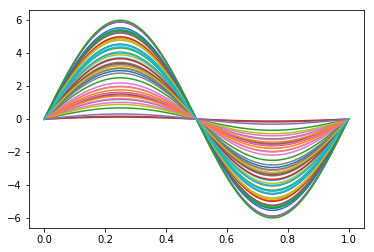

(50, 10, 1000)


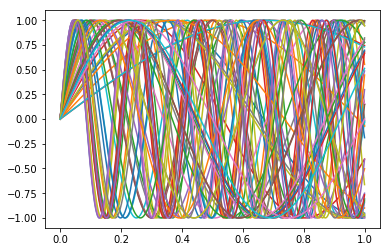

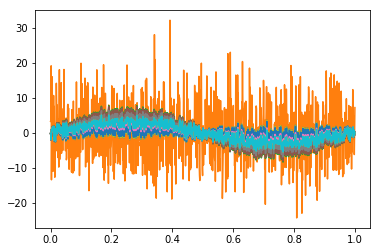

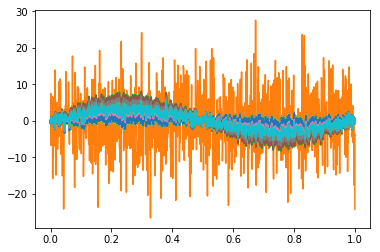

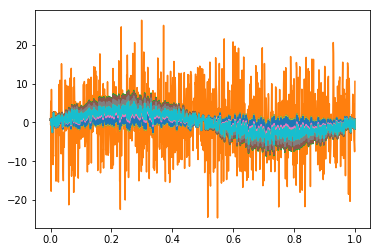

In [14]:
test_dat = success1()
print test_dat[0].shape
for i in range(50):
    plt.plot(np.linspace(0,1,1000), test_dat[0][i,0,:])
plt.show()
test_dat = success2()
print test_dat[0].shape
for i in range(50):
    plt.plot(np.linspace(0,1,1000), test_dat[0][i,0,:])
plt.show()
test_dat = success3()
for j in range(3):
    for i in range(50):
        plt.plot(np.linspace(0,1,1000), test_dat[0][i,j,:])
    plt.show()

In [ ]:
for i in range(0):
    out = StringIO.StringIO()
    test_dat = success3()
    for j in range(3):
        for k in range(50):
            plt.plot(np.linspace(0,1,1000), test_dat[0][k,j,:])
        plt.show()
    mat_test_dat = np.swapaxes(test_dat[0], 1, 2)
    mat_kurt, mat_rej = eng.rejkurt(to_matlab_comp(mat_test_dat), 3, [], 1, nargout = 2, stdout = out)
#     py_jp, py_rej = jointprob(test_dat[0], [1], np.asarray([]), 1, 1000)
#     mat_jp = np.asarray(mat_jp)
#     mat_rej = np.asarray(mat_rej)
#     # See results
#     print "Shapes Equal?:", py_jp.shape == mat_jp.shape
#     print "Python head"
#     print py_jp[0:2,:]
#     print "MATLAB Head"
#     print mat_jp[0:2,:]
#     print np.all(np.isclose(py_jp, mat_jp, atol=.1, equal_nan=True))
#     print "MATLAB has any NaNs?:", np.isnan(mat_jp).any()
# #     print "Python vals bad elec"
# #     print py_jp[test_dat[2][0]]
# #     print py_rej[0][test_dat[2][0]]
# #     print "MATLAB vals bad elec"
# #     print mat_jp[test_dat[2][0]]
# #     print mat_rej[test_dat[2][0]]
#     print "Python has any NaNs?:", np.isnan(py_jp).any()
#     print "Arrays close (.1) tolerance?:", np.isclose(py_jp, mat_jp, atol=.1).all()
#     print "Badelecs recognized the same?:", np.array_equal(py_rej[0][test_dat[2][0]], mat_rej[test_dat[2][0]])
#     print "All electrode/trial rejections the same?:", np.array_equal(py_rej, mat_rej)
#     rej_differences = np.logical_xor(py_rej, mat_rej)
#     rej_locs = np.where(np.any(rej_differences))

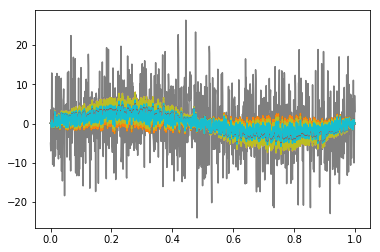

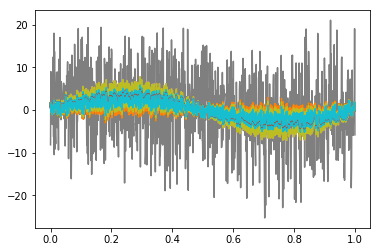

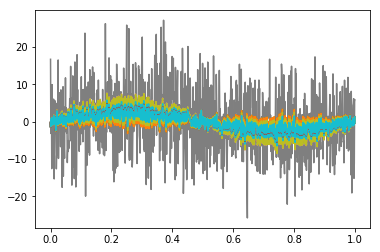

In [84]:
test_dat = success3()
for j in range(3):
    for k in range(50):
        plt.plot(np.linspace(0,1,1000), test_dat[0][k,j,:])
    plt.show()
mat_test_dat = np.swapaxes(test_dat[0], 1, 2)
mat_kurt, mat_rej = eng.rejkurt(to_matlab_comp(mat_test_dat, eng), 2, [], 1, nargout = 2)

In [85]:
py_kurt, py_rej = kurt_baddetec(test_dat[0], [2])

In [86]:
print py_kurt.shape

(50, 10)


In [87]:
mat_kurt = np.asarray(mat_kurt)

In [88]:
print mat_kurt.shape

(50, 10)


In [89]:
diff_kurt = abs(py_kurt - mat_kurt)

In [90]:
print "Max Difference", np.max(diff_kurt)
print "Min Difference", np.min(diff_kurt)
print "Mean Difference", np.mean(diff_kurt)
print "Mean Python", np.mean(abs(py_kurt))
print "Mean MATLAB", np.mean(abs(mat_kurt))
print "Same bad elecs", np.array_equal(py_rej[0], np.asarray(mat_rej))

Max Difference 0.104568328224
Min Difference 0.000718644389958
Mean Difference 0.0439030463324
Mean Python 0.855531331215
Mean MATLAB 0.811628284883
Same bad elecs False


In [91]:
mat_rej = np.asarray(mat_rej)

False
(array([ 0,  1,  4, 10, 13, 15, 17, 18, 19, 22, 26, 28, 29, 31, 32, 33, 34,
       36, 37, 38, 41]),)


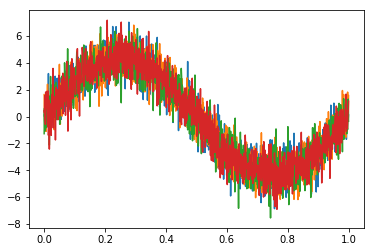

(array([0]),)


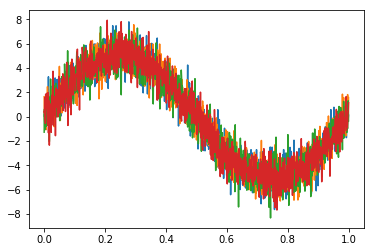

(array([0]),)


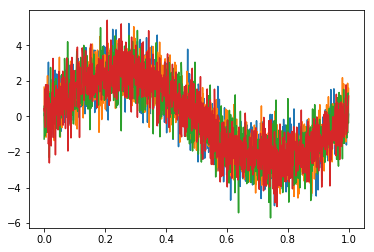

(array([], dtype=int64),)


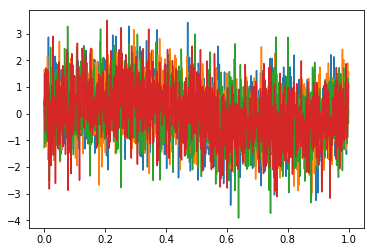

(array([], dtype=int64),)


In [117]:
print mat_rej.any()
print np.where(np.any(py_rej[0], axis = 1))
bad_elecs = np.where(np.any(py_rej[0], axis = 1))
for i in range(4):
    for j in range(4):
        plt.plot(np.linspace(0,1,1000), test_dat[0][i,j,:])
    plt.show()
    print np.where(np.any(py_rej[0][i,:]))

In [109]:
test_glob_dat = np.reshape(test_dat[0], (test_dat[0].shape[0], test_dat[0].shape[1] * test_dat[0].shape[2]))

In [178]:
out = StringIO.StringIO()
mat_glob_kurt, mat_glob_rej, sweeps = eng.rejkurt(to_matlab_comp(test_glob_dat, eng), 1, [], 1, nargout = 3)

In [179]:
mat_glob_kurt = np.asarray(mat_glob_kurt)
mat_glob_rej = np.asarray(mat_glob_rej)

In [180]:
print mat_glob_kurt.shape
print mat_glob_rej.any()
print sweeps

(50, 1)
True
1.0


In [181]:
py_glob_kurt, py_glob_rej = kurt_baddetec(test_glob_dat, [1])

In [182]:
print np.isclose(py_glob_kurt, mat_glob_kurt, atol=.1).all()

True


In [192]:
print np.array_equal(py_glob_rej[0], mat_glob_rej)
py_bad = []
mat_bad = []
for i in range(py_glob_rej[0].shape[0]):
    if py_glob_rej[0][i].any():
        py_bad.append(i)
for i in range(mat_glob_rej.shape[0]):
    if mat_glob_rej[i].any():
        mat_bad.append(i)

False


In [191]:
print py_bad

[1, 3, 4, 6, 7, 14, 17, 25, 26, 29, 30, 32, 38, 41, 48]


In [188]:
print mat_bad

[1, 3, 6, 7, 14, 17, 25, 26, 29, 30, 32, 38, 41, 48]


In [196]:
print "Electrodes found by Python but not MATLAB:", set(py_bad) - set(mat_bad)
print "Electrodes found by MATLAB but not Python:",  set(mat_bad) - set(py_bad)

Electrodes found by Python but not MATLAB: set([4])
Electrodes found by MATLAB but not Python: set([])


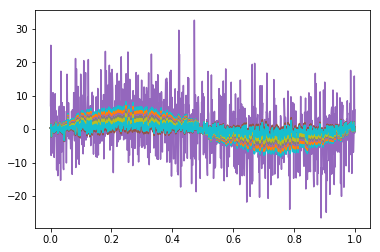

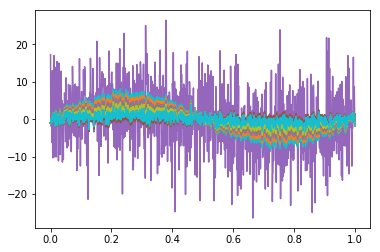

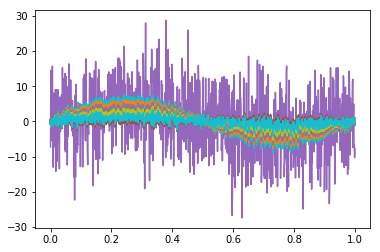

Max Difference 0.127610912672
Min Difference 0.000246219584131
Mean Difference 0.0409556962686
Mean Python 0.798096812787
Mean MATLAB 0.757141116519
Same bad elecs True
False
(array([], dtype=int64),)
Global Kurtoses within .1?: True
Rejected electrodes the same?: False
Electrodes found by Python but not MATLAB: set([1])
Electrodes found by MATLAB but not Python: set([])


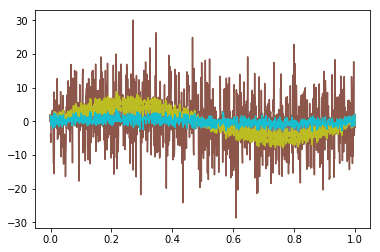

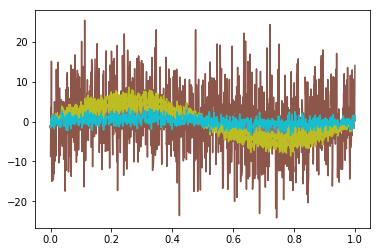

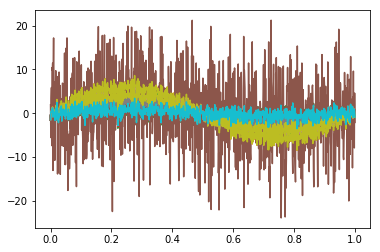

Max Difference 0.131242761054
Min Difference 9.54939826076e-06
Mean Difference 0.0396079560805
Mean Python 0.771833624839
Mean MATLAB 0.732225668759
Same bad elecs True
False
(array([], dtype=int64),)
Global Kurtoses within .1?: True
Rejected electrodes the same?: False
Electrodes found by Python but not MATLAB: set([15])
Electrodes found by MATLAB but not Python: set([])


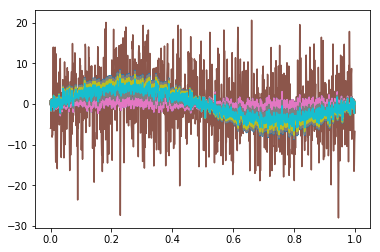

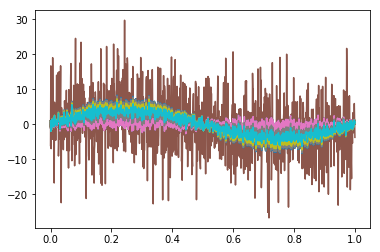

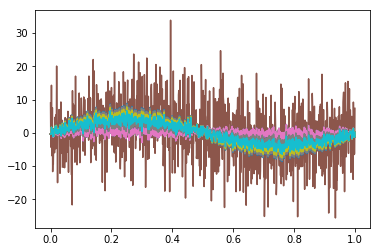

Max Difference 0.124049806697
Min Difference 4.36722059615e-05
Mean Difference 0.0434412982125
Mean Python 0.846533322724
Mean MATLAB 0.803092024512
Same bad elecs True
False
(array([], dtype=int64),)
Global Kurtoses within .1?: True
Rejected electrodes the same?: True
Electrodes found by Python but not MATLAB: set([])
Electrodes found by MATLAB but not Python: set([])


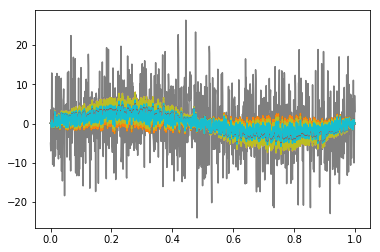

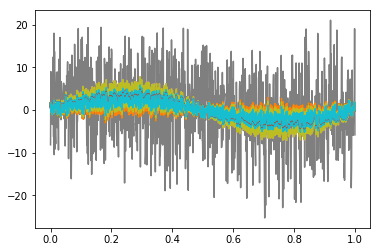

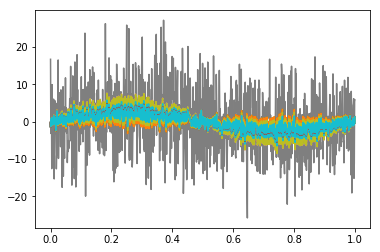

Max Difference 0.104568328224
Min Difference 0.000718644389958
Mean Difference 0.0439030463324
Mean Python 0.855531331215
Mean MATLAB 0.811628284883
Same bad elecs True
False
(array([], dtype=int64),)
Global Kurtoses within .1?: True
Rejected electrodes the same?: False
Electrodes found by Python but not MATLAB: set([4])
Electrodes found by MATLAB but not Python: set([])


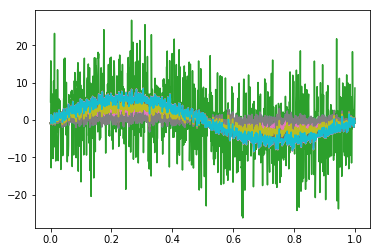

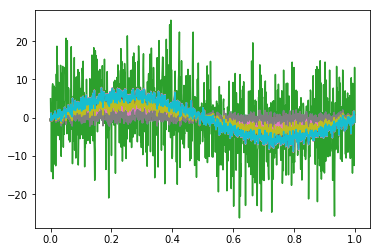

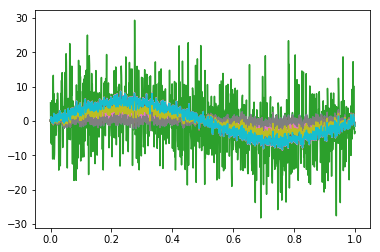

Max Difference 0.105369840148
Min Difference 0.000226677103132
Mean Difference 0.0424004465276
Mean Python 0.826250419781
Mean MATLAB 0.783849973254
Same bad elecs True
False
(array([], dtype=int64),)
Global Kurtoses within .1?: True
Rejected electrodes the same?: True
Electrodes found by Python but not MATLAB: set([])
Electrodes found by MATLAB but not Python: set([])


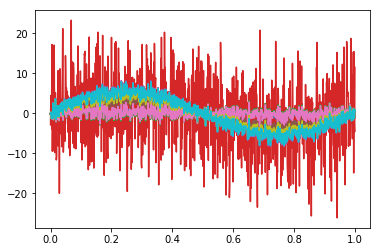

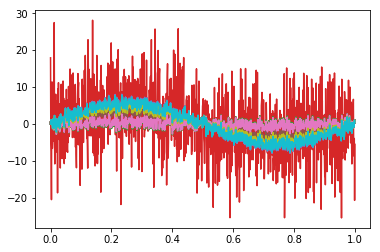

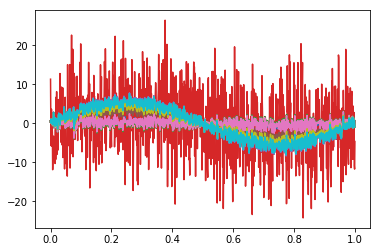

Max Difference 0.118438064253
Min Difference 0.000364079301541
Mean Difference 0.0432929407336
Mean Python 0.84364230531
Mean MATLAB 0.800349364577
Same bad elecs True
False
(array([], dtype=int64),)
Global Kurtoses within .1?: True
Rejected electrodes the same?: True
Electrodes found by Python but not MATLAB: set([])
Electrodes found by MATLAB but not Python: set([])


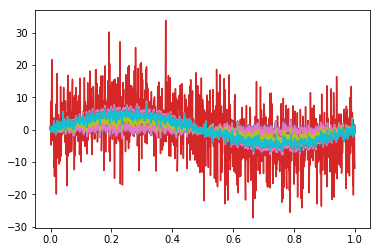

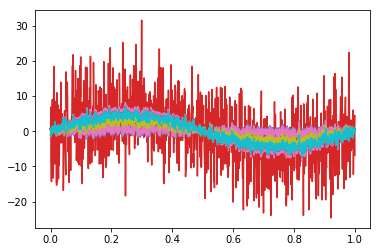

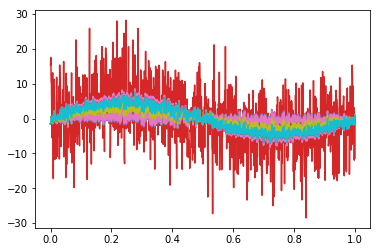

Max Difference 0.138846210009
Min Difference 0.000399063940485
Mean Difference 0.0454211988108
Mean Python 0.885115315
Mean MATLAB 0.83969411619
Same bad elecs True
False
(array([], dtype=int64),)
Global Kurtoses within .1?: True
Rejected electrodes the same?: True
Electrodes found by Python but not MATLAB: set([])
Electrodes found by MATLAB but not Python: set([])


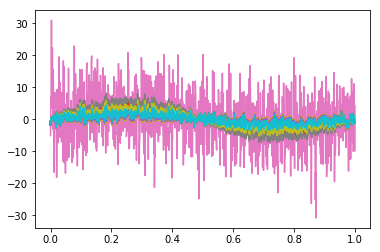

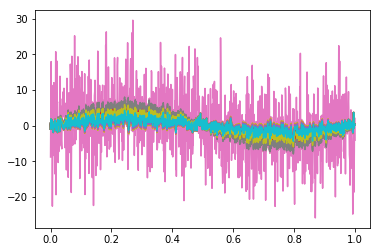

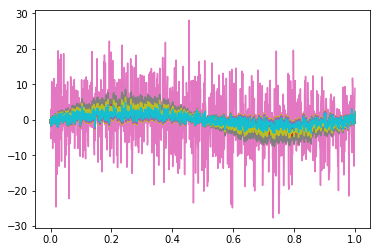

Max Difference 0.1069775
Min Difference 0.000167251923802
Mean Difference 0.042429678848
Mean Python 0.826820065127
Mean MATLAB 0.784390386279
Same bad elecs True
False
(array([], dtype=int64),)
Global Kurtoses within .1?: True
Rejected electrodes the same?: False
Electrodes found by Python but not MATLAB: set([20])
Electrodes found by MATLAB but not Python: set([])


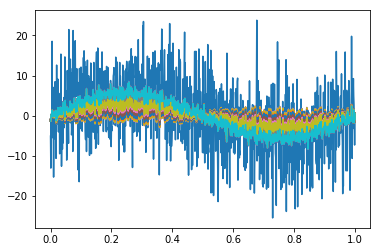

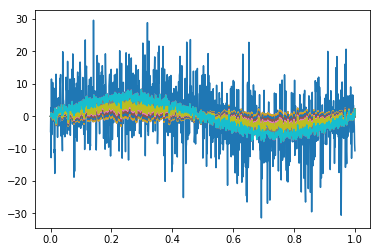

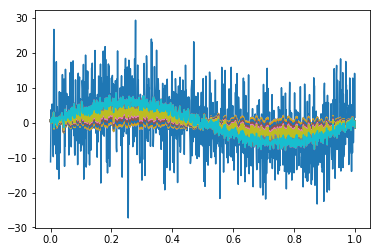

Max Difference 0.106588656429
Min Difference 0.000256279879027
Mean Difference 0.0433222916557
Mean Python 0.844214261828
Mean MATLAB 0.800891970172
Same bad elecs True
False
(array([], dtype=int64),)
Global Kurtoses within .1?: True
Rejected electrodes the same?: False
Electrodes found by Python but not MATLAB: set([19])
Electrodes found by MATLAB but not Python: set([])


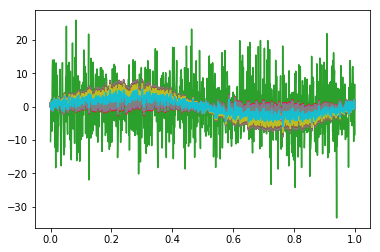

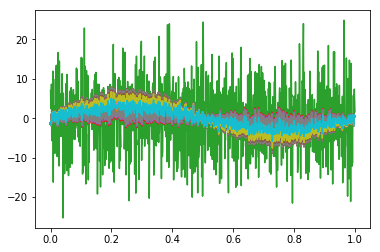

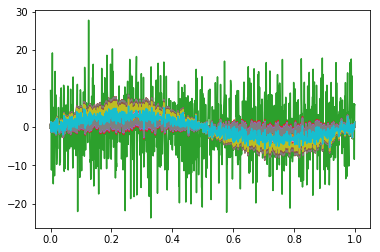

Max Difference 0.109160103423
Min Difference 0.000255564972418
Mean Difference 0.0422661634288
Mean Python 0.823633667463
Mean MATLAB 0.781367504035
Same bad elecs True
False
(array([], dtype=int64),)
Global Kurtoses within .1?: True
Rejected electrodes the same?: False
Electrodes found by Python but not MATLAB: set([20])
Electrodes found by MATLAB but not Python: set([])


In [198]:
for i in range(10):
    out = StringIO.StringIO()
    test_dat = success3()
    for j in range(3):
        for k in range(50):
            plt.plot(np.linspace(0,1,1000), test_dat[0][k,j,:])
        plt.show()
    mat_test_dat = np.swapaxes(test_dat[0], 1, 2)
    mat_kurt, mat_rej = eng.rejkurt(to_matlab_comp(mat_test_dat, eng), 3, [], 1, nargout = 2)
    mat_kurt = np.asarray(mat_kurt)
    mat_rej = np.asarray(mat_rej)
    py_kurt, py_rej = kurt_baddetec(test_dat[0], [3])
    diff_kurt = abs(py_kurt - mat_kurt)
    print "Max Difference", np.max(diff_kurt)
    print "Min Difference", np.min(diff_kurt)
    print "Mean Difference", np.mean(diff_kurt)
    print "Mean Python", np.mean(abs(py_kurt))
    print "Mean MATLAB", np.mean(abs(mat_kurt))
    print "Same bad elecs", np.array_equal(py_rej[0], np.asarray(mat_rej))
    print mat_rej.any()
    print np.where(np.any(py_rej[0], axis = 1))
    bad_elecs = np.where(np.any(py_rej[0], axis = 1))
    test_glob_dat = np.reshape(test_dat[0], (test_dat[0].shape[0], test_dat[0].shape[1] * test_dat[0].shape[2]))
    out = StringIO.StringIO()
    mat_glob_kurt, mat_glob_rej = eng.rejkurt(to_matlab_comp(test_glob_dat, eng), 1, [], 3, nargout = 2)
    mat_glob_kurt = np.asarray(mat_glob_kurt)
    mat_glob_rej = np.asarray(mat_glob_rej)
    py_glob_kurt, py_glob_rej = kurt_baddetec(test_glob_dat, [1])
    print "Global Kurtoses within .1?:", np.isclose(py_glob_kurt, mat_glob_kurt, atol=.1).all()
    print "Rejected electrodes the same?:", np.array_equal(py_glob_rej[0], mat_glob_rej)
    py_bad = []
    mat_bad = []
    for i in range(py_glob_rej[0].shape[0]):
        if py_glob_rej[0][i].any():
            py_bad.append(i)
    for i in range(mat_glob_rej.shape[0]):
        if mat_glob_rej[i].any():
            mat_bad.append(i)
    print "Electrodes found by Python but not MATLAB:", set(py_bad) - set(mat_bad)
    print "Electrodes found by MATLAB but not Python:",  set(mat_bad) - set(py_bad)